# Building permits exercise

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

permit = pd.read_csv('../data/external/Building_Permits.csv', low_memory=False)

ModuleNotFoundError: No module named 'matplotlib'

#### Basic info on the `Building Permits` dataframe

In [ ]:
pd.options.display.max_columns = 50
permit.head()

In [144]:
print("Shape:", permit.shape)
total = np.product(permit.shape)
print("Number of overall data:", total)

Shape: (198900, 43)
Number of overall data: 8552700


---
## Non-missing values
#### Number of non-missing data

In [126]:
non_missing_total = permit.notnull().sum().sum()
print("Number of overall non-missing data:", non_missing_total)

Number of overall non-missing data: 6306759


In [127]:
non_missing_count = permit.count()
non_missing_count

Permit Number                             198900
Permit Type                               198900
Permit Type Definition                    198900
Permit Creation Date                      198900
Block                                     198900
Lot                                       198900
Street Number                             198900
Street Number Suffix                        2216
Street Name                               198900
Street Suffix                             196132
Unit                                       29479
Unit Suffix                                 1961
Description                               198610
Current Status                            198900
Current Status Date                       198900
Filed Date                                198900
Issued Date                               183960
Completed Date                             97191
First Construction Document Date          183954
Structural Notification                     6922
Number of Existing S

#### Information on non-missing values

In [128]:
non_missing_info = permit.info()
non_missing_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Number                           198900 non-null  object 
 1   Permit Type                             198900 non-null  int64  
 2   Permit Type Definition                  198900 non-null  object 
 3   Permit Creation Date                    198900 non-null  object 
 4   Block                                   198900 non-null  object 
 5   Lot                                     198900 non-null  object 
 6   Street Number                           198900 non-null  int64  
 7   Street Number Suffix                    2216 non-null    object 
 8   Street Name                             198900 non-null  object 
 9   Street Suffix                           196132 non-null  object 
 10  Unit                                    2947

---
## Missing values
#### Check if there are any missing values in the data

In [129]:
missing = permit.isnull()
missing.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,True,False,True,False,True,True,True,False,False,False,False,False,True,True,False,True,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False,True,True,True,False,False,False,False,True,True,True,False,True,False,False,True,True,True,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,True,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,True,False,True,False,True,True,True,False,False,False,False,True,True,True,False,True,False,False,True,True,True,False,False,False,False,False


#### Overall missing data

In [130]:
missing_total = np.count_nonzero(missing)
print("Number of overall missing data:", missing_total)

Number of overall missing data: 2245941


#### Number of missing values in each field (`Sum` method)

In [131]:
missing_count = missing.sum()
missing_count

Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

#### Ratio of missing values

In [132]:
missing_count / len(permit)

Permit Number                             0.000000
Permit Type                               0.000000
Permit Type Definition                    0.000000
Permit Creation Date                      0.000000
Block                                     0.000000
Lot                                       0.000000
Street Number                             0.000000
Street Number Suffix                      0.988859
Street Name                               0.000000
Street Suffix                             0.013917
Unit                                      0.851790
Unit Suffix                               0.990141
Description                               0.001458
Current Status                            0.000000
Current Status Date                       0.000000
Filed Date                                0.000000
Issued Date                               0.075113
Completed Date                            0.511357
First Construction Document Date          0.075143
Structural Notification        

#### Percent of total values missing

In [134]:
missing_percentage_total = (missing_total / total) * 100
print('Percent of total values missing: {:.2f}%'.format(missing_percentage_total))

Percent of total values missing: 26.26%


#### Percent of values missing in each field

In [135]:
missing_percentage = permit.isnull().mean().round(4) * 100
missing_percentage.sort_values()

Permit Number                               0.00
Filed Date                                  0.00
Current Status Date                         0.00
Current Status                              0.00
Street Name                                 0.00
Street Number                               0.00
Record ID                                   0.00
Block                                       0.00
Permit Creation Date                        0.00
Permit Type Definition                      0.00
Permit Type                                 0.00
Lot                                         0.00
Description                                 0.15
Location                                    0.85
Zipcode                                     0.86
Supervisor District                         0.86
Neighborhoods - Analysis Boundaries         0.87
Street Suffix                               1.39
Revised Cost                                3.05
Issued Date                                 7.51
First Construction D

---
1. Can you try predicting permit issue times for various permit types? Which ones matter more?
2. Can you suggest which is the best week day to visit Department of building inspections, based on this data?


#### Q. For the different types of missing values, infer why you think they are missing? Why could they be missing?

<AxesSubplot:>

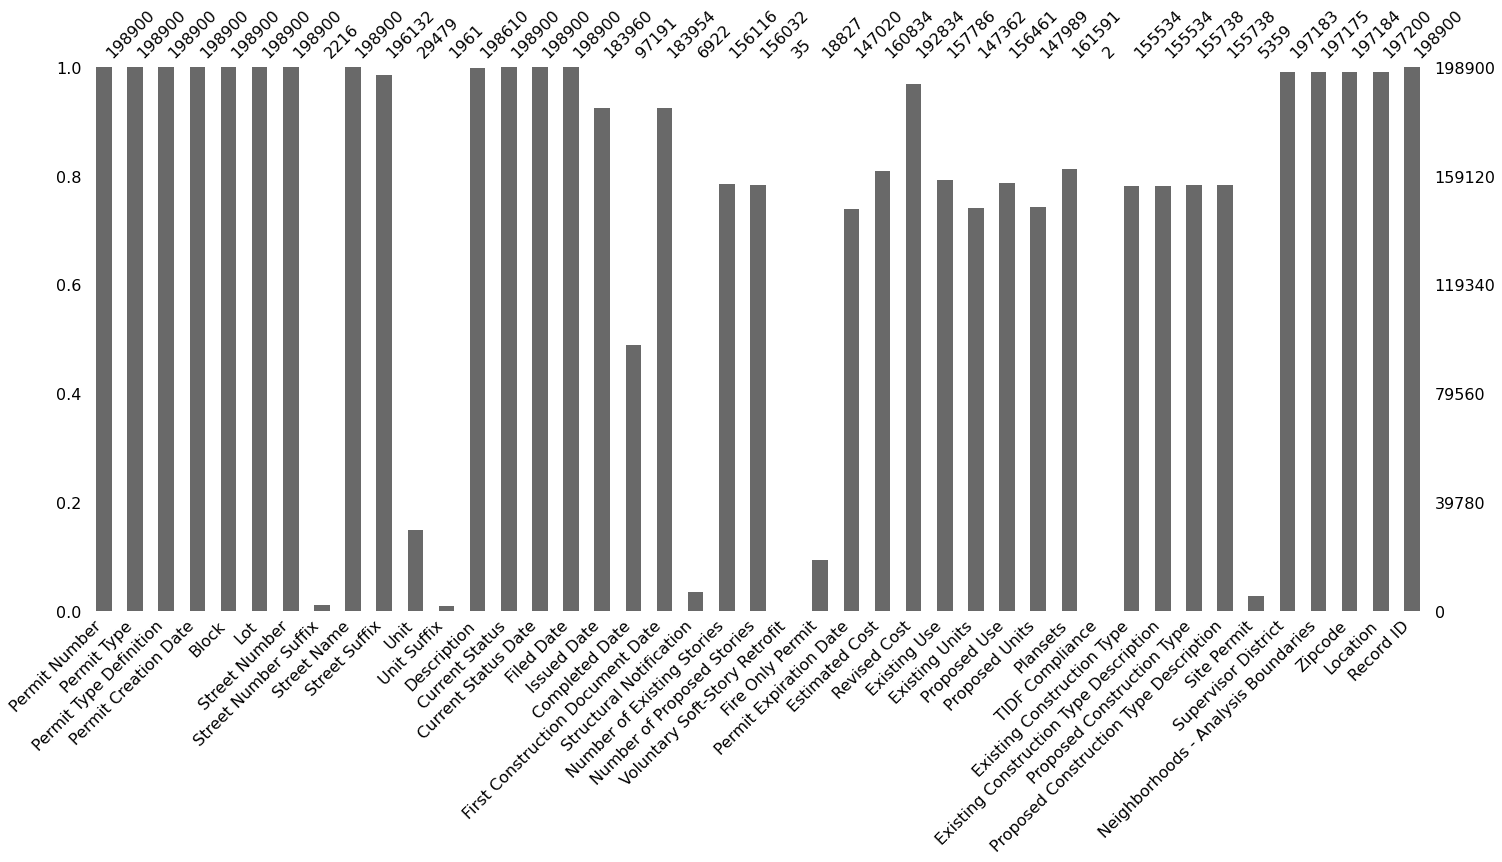

In [136]:
%matplotlib inline
mno.bar(permit)

__Do not exist__

`Unit`

`Fire Only Permit`

`Structural Notification`

`Site Permit`

`Street Number Suffix`

`Unit Suffix`

`Voluntary Soft-Story Retrofit`

`Completed Date`

`Permit Expiration Date`

`Existing Units`

`Proposed Units`

__Missing Completely at Random(MCAR)__: Not important. Can be deleted or imputed.

`TIDF Compliance`
`Plansets`

__Missing at Random(MAR)__: Didn't have the information. Should be imputed, or regression.

`Issued Date`
`Description`
`Location`
`Zipcode`
`Supervisor District`
`Street Suffix`

__Not Missing at Random(NMAR)__: Didn't want to answer. Dependent on other data. Must be filled correctly with model based method, or regression.

`First Construction Document Date`
`Revised Cost`
`Neighborhoods - Analysis Boundaries`
`Number of Proposed Stories`
`Number of Existing Stories`
`Estimated Cost`
`Proposed Use`
`Existing Use`
`Existing Construction Type`
`Existing Construction Type Description`
`Proposed Construction Type`
`Proposed Construction Type Description`





#### Q. What happens if you were to drop all missing values? Is this a good option?

In [147]:
permit_dropped = permit.dropna()
permit_dropped

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


There will be no rows left in the dataframe if I remove a row with missing values.

In [148]:
permit_dropped_column = permit.dropna(axis=1)
permit_dropped_column

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,expired,12/21/2017,05/06/2015,1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,issued,08/03/2017,04/19/2016,1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,withdrawn,09/26/2017,05/27/2016,1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,complete,07/24/2017,11/07/2016,1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,issued,12/01/2017,11/28/2016,144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,Montgomery,issued,12/05/2017,12/05/2017,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,Bush,issued,12/06/2017,12/05/2017,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,Indiana,issued,12/06/2017,12/06/2017,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,Sutter,issued,12/06/2017,12/06/2017,1489608233656


There will be only 12 columns left if colun

#### Fill in all missing values using at least two methods.

__Create Training and Test data__

__1) Drop columns with missing values__

In [137]:
cols_with_missing = [col for col in permit.columns
                                 if permit[col].isnull().any()]
reduced_original = permit.drop(cols_with_missing, axis=1)

reduced_original

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,expired,12/21/2017,05/06/2015,1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,issued,08/03/2017,04/19/2016,1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,withdrawn,09/26/2017,05/27/2016,1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,complete,07/24/2017,11/07/2016,1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,issued,12/01/2017,11/28/2016,144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,Montgomery,issued,12/05/2017,12/05/2017,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,Bush,issued,12/06/2017,12/05/2017,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,Indiana,issued,12/06/2017,12/06/2017,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,Sutter,issued,12/06/2017,12/06/2017,1489608233656


Check if any missing data still exists

In [138]:
permit_no_missing = reduced_original.isnull()
permit_no_missing.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


__2) Drop if entire row more than 2 missing values__

In [139]:
permit.dropna(axis=1, thresh=2)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,NaN,NaN,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,0.0,NaN,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,NaN,08/03/2017,NaN,7.0,NaN,NaN,NaN,12/03/2017,1.0,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,NaN,NaN,installation of separating wall,withdrawn,09/26/2017,05/27/2016,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,20000.0,NaN,retail sales,39.0,retail sales,39.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,0.0,NaN,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/24/2017,07/18/2017,NaN,2.0,2.0,NaN,NaN,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,NaN,NaN,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,NaN,11/20/2017,NaN,3.0,NaN,NaN,NaN,12/01/2018,100000.0,100000.0,retail sales,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,NaN,Montgomery,St,NaN,NaN,street space,issued,12/05/2017,12/05/2017,12/05/2017,NaN,12/05/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,NaN,Bush,St,NaN,NaN,fire alarm upgrade ref 201704123852,issued,12/06/2017,12/05/2017,12/06/2017,NaN,12/06/2017,NaN,4.0,4.0,NaN,Y,04/06/2018,5000.0,5000.0,apartments,4.0,apartments,4.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,NaN,NaN,NaN,NaN,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,NaN,Indiana,St,NaN,NaN,street space,issued,12/06/2017,12/06/2017,12/06/2017,NaN,12/06/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,NaN,Sutter,St,NaN,NaN,street space permit,issued,12/06/2017,12/06/2017,12/06/2017,NaN,12/06/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489608233656


__3) Imputation__

__4) Simple imputer__

In [140]:
permit = permit.infer_objects()
permit.dtypes

Permit Number                              object
Permit Type                                 int64
Permit Type Definition                     object
Permit Creation Date                       object
Block                                      object
Lot                                        object
Street Number                               int64
Street Number Suffix                       object
Street Name                                object
Street Suffix                              object
Unit                                      float64
Unit Suffix                                object
Description                                object
Current Status                             object
Current Status Date                        object
Filed Date                                 object
Issued Date                                object
Completed Date                             object
First Construction Document Date           object
Structural Notification                    object


In [141]:
simple_imputer = SimpleImputer()
# permit_imputed = simple_imputer.fit_transform(permit)


#### What statistical impact does filling this data have on averages, standard deviations, and correlations between data?

In [142]:
permit.describe()




,Permit Type,Street Number,Unit,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Existing Units,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Zipcode,Record ID
count,198900.000000,198900.000000,29479.000000,156116.000000,156032.000000,1.608340e+05,1.928340e+05,147362.000000,147989.000000,161591.000000,155534.000000,155738.000000,197183.000000,197184.000000,1.989000e+05
mean,7.522323,1121.728944,78.517182,5.705773,5.745043,1.689554e+05,1.328562e+05,15.666164,16.510950,1.274650,4.072878,4.089529,5.538403,94115.500558,1.162048e+12
std,1.457451,1135.768948,326.981324,8.613455,8.613284,3.630386e+06,3.584903e+06,74.476321,75.220444,22.407345,1.585756,1.578766,2.887041,9.270131,4.918215e+11
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,94102.000000,1.293532e+10
25%,8.000000,235.000000,0.000000,2.000000,2.000000,3.300000e+03,1.000000e+00,1.000000,1.000000,0.000000,3.000000,3.000000,3.000000,94109.000000,1.308567e+12
50%,8.000000,710.000000,0.000000,3.000000,3.000000,1.100000e+04,7.000000e+03,1.000000,2.000000,2.000000,5.000000,5.000000,6.000000,94114.000000,1.371840e+12
75%,8.000000,1700.000000,1.000000,4.000000,4.000000,3.500000e+04,2.870750e+04,4.000000,4.000000,2.000000,5.000000,5.000000,8.000000,94122.000000,1.435000e+12
max,8.000000,8400.000000,6004.000000,78.000000,78.000000,5.379586e+08,7.805000e+08,1907.000000,1911.000000,9000.000000,5.000000,5.000000,11.000000,94158.000000,1.498342e+12
